# Tokenization and Embeddings

In [1]:
import openai
import os

from dotenv import load_dotenv
load_dotenv()

from unstructured.partition.text import partition_text
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

In [2]:
from unstructured.cleaners.core import group_broken_paragraphs
elements = partition_text('data/Stein.txt', paragraph_grouper=group_broken_paragraphs)

In [3]:
print("\n\n".join([str(el) for el in elements][:10]))


Mr und Mrs Dursley im Ligusterweg Nummer 4 waren stolz darauf, ganz und gar normal zu sein, sehr stolz sogar. Niemand wäre auf die Idee gekommen, sie könnten sich in eine merkwürdige und geheimnisvolle Geschichte verstricken, denn mit solchem Unsinn wollten sie nichts zu tun haben. Mr Dursley war Direktor einer Firma namens Grunnings, die Bohrmaschinen herstellte. Er war groß und bullig und hatte fast keinen Hals, dafür aber einen sehr großen Schnurrbart. Mrs Dursley war dünn und blond und besaß doppelt so viel Hals, wie notwendig gewesen wäre, was allerdings sehr nützlich war, denn so konnte sie den Hals über den Gartenzaun recken und zu den Nachbarn hinüberspähen. Die Dursleys hatten einen kleinen Sohn namens Dudley und in ihren Augen gab es nirgendwo einen prächtigeren Jungen.

Die Dursleys besaßen alles, was sie wollten, doch sie hatten auch ein Geheimnis, und dass es jemand aufdecken könnte, war ihre größte Sorge. Einfach unerträglich wäre es, wenn die Sache mit den Potters heraus

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
story_texts = [str(el) for el in elements]
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(story_texts))
print(f"\nTotal chunks: {len(character_split_texts)}")


Total chunks: 744


In [6]:
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=128, model_name="paraphrase-multilingual-MiniLM-L12-v2")

token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

print(f"\nTotal chunks: {len(token_split_texts)}")


Total chunks: 1400
521
Mr und Mrs Dursley im Ligusterweg Nummer 4 waren stolz darauf, ganz und gar normal zu sein, sehr stolz sogar. Niemand wäre auf die Idee gekommen, sie könnten sich in eine merkwürdige und geheimnisvolle Geschichte verstricken, denn mit solchem Unsinn wollten sie nichts zu tun haben. Mr Dursley war Direktor einer Firma namens Grunnings, die Bohrmaschinen herstellte. Er war groß und bullig und hatte fast keinen Hals, dafür aber einen sehr großen Schnurrbart. Mrs Dursley war dünn und blond und besaß doppelt so viel Hals


In [7]:
print(token_split_texts[0])

Mr und Mrs Dursley im Ligusterweg Nummer 4 waren stolz darauf, ganz und gar normal zu sein, sehr stolz sogar. Niemand wäre auf die Idee gekommen, sie könnten sich in eine merkwürdige und geheimnisvolle Geschichte verstricken, denn mit solchem Unsinn wollten sie nichts zu tun haben. Mr Dursley war Direktor einer Firma namens Grunnings, die Bohrmaschinen herstellte. Er war groß und bullig und hatte fast keinen Hals, dafür aber einen sehr großen Schnurrbart. Mrs Dursley war dünn und blond und besaß doppelt so viel Hals


In [9]:
from sentence_transformers import SentenceTransformer, models
model_name = "paraphrase-multilingual-MiniLM-L12-v2"
model = SentenceTransformer(model_name)
tokenized_chunks = []
for text in character_split_texts[:2]:
    # Tokenize each chunk
    encoded_input = model.tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    # Convert token IDs back to tokens
    tokens = model.tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0].tolist())
    tokenized_chunks.append(tokens)

# Print the tokenized chunks
for i, tokens in enumerate(tokenized_chunks):
    print(f"Chunk {i}: {tokens}")
    print(len(tokens))



Chunk 0: ['<s>', '▁Mr', '▁und', '▁Mrs', '▁Dur', 's', 'ley', '▁im', '▁Lig', 'u', 'ster', 'weg', '▁Nummer', '▁4', '▁waren', '▁stolz', '▁darauf', ',', '▁ganz', '▁und', '▁gar', '▁normal', '▁zu', '▁sein', ',', '▁sehr', '▁stolz', '▁sogar', '.', '▁Niemand', '▁wäre', '▁auf', '▁die', '▁Idee', '▁gekommen', ',', '▁sie', '▁könnten', '▁sich', '▁in', '▁eine', '▁merk', 'würdig', 'e', '▁und', '▁geheim', 'nis', 'volle', '▁Geschichte', '▁vers', 'trick', 'en', ',', '▁denn', '▁mit', '▁solche', 'm', '▁Un', 'sinn', '▁wollte', 'n', '▁sie', '▁nichts', '▁zu', '▁tun', '▁haben', '.', '▁Mr', '▁Dur', 's', 'ley', '▁war', '▁Direktor', '▁einer', '▁Firma', '▁namen', 's', '▁Grunn', 'ings', ',', '▁die', '▁Boh', 'r', 'maschine', 'n', '▁herstel', 'lte', '.', '▁Er', '▁war', '▁groß', '▁und', '▁bul', 'lig', '▁und', '▁hatte', '▁fast', '▁keinen', '▁Hal', 's', ',', '▁dafür', '▁aber', '▁einen', '▁sehr', '▁großen', '▁Sch', 'nur', 'r', 'bart', '.', '▁Mrs', '▁Dur', 's', 'ley', '▁war', '▁dün', 'n', '▁und', '▁blond', '▁und', '▁be', '

In [10]:
from sentence_transformers import SentenceTransformer, models
model_name = "Sahajtomar/German-semantic"
model = SentenceTransformer(model_name)
tokenized_chunks = []
for text in character_split_texts[:2]:
    # Tokenize each chunk
    encoded_input = model.tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    # Convert token IDs back to tokens
    tokens = model.tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0].tolist())
    tokenized_chunks.append(tokens)

# Print the tokenized chunks
for i, tokens in enumerate(tokenized_chunks):
    print(f"Chunk {i}: {tokens}")
    print(len(tokens))

Chunk 0: ['[CLS]', 'Mr', 'und', 'Mrs', 'Dur', '##sl', '##ey', 'im', 'Lig', '##uster', '##weg', 'Nummer', '4', 'waren', 'stolz', 'darauf', ',', 'ganz', 'und', 'gar', 'normal', 'zu', 'sein', ',', 'sehr', 'stolz', 'sogar', '.', 'Niemand', 'wäre', 'auf', 'die', 'Idee', 'gekommen', ',', 'sie', 'könnten', 'sich', 'in', 'eine', 'merk', '##würdige', 'und', 'geheim', '##nis', '##volle', 'Geschichte', 'verst', '##rick', '##en', ',', 'denn', 'mit', 'solche', '##m', 'Unsinn', 'wollten', 'sie', 'nichts', 'zu', 'tun', 'haben', '.', 'Mr', 'Dur', '##sl', '##ey', 'war', 'Direktor', 'einer', 'Firma', 'namens', 'Gru', '##nn', '##ings', ',', 'die', 'Bohr', '##maschinen', 'her', '##stellte', '.', 'Er', 'war', 'groß', 'und', 'bu', '##llig', 'und', 'hatte', 'fast', 'keinen', 'Hals', ',', 'dafür', 'aber', 'einen', 'sehr', 'großen', 'Schn', '##urr', '##bart', '.', 'Mrs', 'Dur', '##sl', '##ey', 'war', 'dünn', 'und', 'blo', '##nd', 'und', 'besaß', 'doppelt', 'so', 'viel', 'Hals', ',', 'wie', 'notwendig', 'gewese

In [11]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction(model_name="paraphrase-multilingual-MiniLM-L12-v2")
print(embedding_function([token_split_texts[10]]))
print(len(embedding_function([token_split_texts[10]])[0]))
print(token_split_texts[10])

[[0.23705792427062988, 0.17953404784202576, 0.008761091157793999, 0.06866278499364853, 0.18859246373176575, 0.025030042976140976, 0.20453552901744843, 0.0856434628367424, -0.12013310939073563, -0.1756037026643753, 0.21593599021434784, 0.17754752933979034, -0.06816255301237106, 0.15382297337055206, 0.03742352873086929, 0.02565864473581314, -0.03674404323101044, 0.09956962615251541, -0.11178182810544968, 0.01585395261645317, -0.14351488649845123, 0.03620703145861626, 0.03634040802717209, 0.13937081396579742, -0.014753739349544048, -0.17134839296340942, 0.10067982226610184, -0.0721849724650383, -0.09251675009727478, -0.20344743132591248, -0.0860968604683876, -0.11146057397127151, 0.20581139624118805, 0.06186888739466667, -0.06888921558856964, -0.021220432594418526, 0.2979533076286316, 0.14489932358264923, 0.14279508590698242, 0.23565231263637543, -0.1417035609483719, -0.10818491131067276, -0.12070940434932709, -0.00885545089840889, -0.026414407417178154, -0.1322002410888672, -0.0280905831

In [13]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection('Stein.txt', embedding_function=embedding_function)

ids = [str(i) for i in range(len(token_split_texts))]

chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()

1400

In [3]:
import umap.umap_ as umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

NameError: name 'chroma_collection' is not defined

In [18]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings

In [19]:
original_query_embedding = embedding_function(["Hogwarts"])

In [20]:
project_original_query = project_embeddings(original_query_embedding, umap_transform)

100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


In [44]:
results = chroma_collection.query(query_texts=["Hogwarts"], n_results=5, include=['documents', 'embeddings'])
print(results['documents'][0])

['sich windend wie eine Schlange, die Gestalt von Worten an. »Jeder nach seiner Lieblingsmelodie«, sagte Dumbledore, »los geht’s!« Und die ganze Schule sang begeistert: Hogwarts, Hogwarts, warzenschweiniges Hogwarts, bring uns was Schönes bei, Ob alt und kahl oder jung und albern, wir sehnen uns Wissen herbei. Denn noch sind unsre Köpfe leer,', '. Hinter dem wilden Bart und den buschigen Augenbrauen entdeckte Harry ein liebevolles Lächeln. »Mach dir keine Sorgen, Harry. Du wirst alles noch schnell genug lernen. In Hogwarts fangen sie alle ganz von vorne an, es wird dir sicher gut gehen. Sei einfach du selbst. Ich weiß, es ist schwer. Du bist auserwählt worden und das ist immer schwer. Aber du wirst eine tolle Zeit in Hogwarts verbringen – wie ich damals – und heute noch, um genau zu sein.«', 'sind ’ne Menge Flaschen, aber –« »Ich wette, ich komme nach Hufflepuff«, sagte Harry bedrückt. »Besser Hufflepuff als Slytherin«, sagte Hagrid mit düsterer Stimme. »Die Hexen und Zauberer, die bös

In [25]:
result_embeddings = results['embeddings']
result_embeddings = [item for sublist in result_embeddings for item in sublist]
projected_result_embeddings = project_embeddings(result_embeddings, umap_transform)
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|██████████| 1400/1400 [15:51<00:00,  1.47it/s]


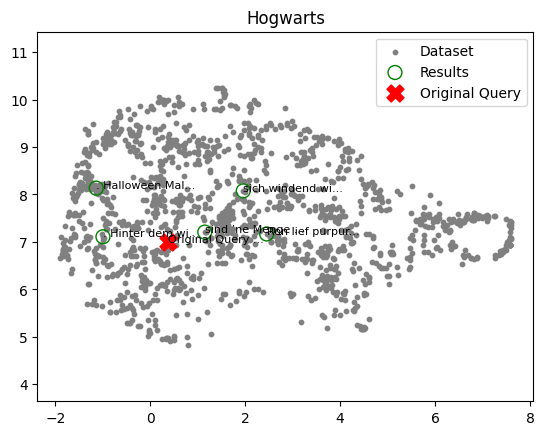

In [47]:
import matplotlib.pyplot as plt

def shorten_text(text, max_length=15):
    """ Shortens text to max_length and adds an ellipsis if the text was shortened. """
    return (text[:max_length] + '...') if len(text) > max_length else text

plt.figure()

# Scatter plots
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray', label='Dataset')
plt.scatter(projected_result_embeddings[:, 0], projected_result_embeddings[:, 1], s=100, facecolors='none', edgecolors='g', label='Results')
plt.scatter(project_original_query[:, 0], project_original_query[:, 1], s=150, marker='X', color='r', label='Original Query')

# Assuming result_texts is an array of texts for the results
# result_texts = ['text1', 'text2', ..., 'text5']

for i, text in enumerate(results['documents'][0]):
    if i < len(projected_result_embeddings):
        plt.annotate(shorten_text(text), (projected_result_embeddings[i, 0], projected_result_embeddings[i, 1]), fontsize=8)

# Assuming you have text for the original query
original_query_text = 'Original Query Text'  # Replace with your actual text for the original query
plt.annotate(shorten_text(original_query_text), (project_original_query[0, 0], project_original_query[0, 1]), fontsize=8)

plt.gca().set_aspect('equal', 'datalim')
plt.title('Hogwarts')
plt.legend()
plt.show()

In [4]:
import umap
import numpy as np
from tqdm import tqdm

# Adjusted UMAP transform for 3D projection
embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform_3d = umap.UMAP(n_components=3, random_state=0, transform_seed=0).fit(embeddings)

def project_embeddings_3d(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings), 3))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])[0]
    return umap_embeddings

NameError: name 'chroma_collection' is not defined

In [ ]:
project_original_query = project_embeddings_3d(original_query_embedding, umap_transform)
projected_result_embeddings = project_embeddings_3d(result_embeddings, umap_transform)
projected_dataset_embeddings = project_embeddings_3d(embeddings, umap_transform)